# Including Packages
Yfinance package is downloaded and used to download the financial data for "ATOM-USD". Numpy library provides and supports a lot of mathematical operations which are needed in designing a price derivative of a stock. Pandas library provides data structures and operations to manipulate and analyse data. Matplotlib is a plotting library for Numpy which provides embeded plots. The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.

In [405]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

# Data import via Yahoo Finance for Cosmos ATOM - USD ( 1 year)

In [406]:
Atom = yf.download("ATOM-USD", start = "2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [407]:
Atom.head() #Shows the first five rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,17.630102,18.652367,17.614876,18.610485,18.610485,472927334
2021-03-02,18.606085,20.366325,18.097910,18.822123,18.822123,718143875
2021-03-03,18.832088,21.890427,18.714214,21.437494,21.437494,757982550
2021-03-04,21.430944,21.661207,18.300385,18.915333,18.915333,787374729
2021-03-05,18.879860,19.210798,18.021107,18.692411,18.692411,476063491


In [408]:
Atom.tail()   #Shows the last five rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,24.936354,27.400043,24.350094,27.225927,27.225927,898558382
2022-02-26,27.232702,30.286327,27.206915,29.807392,29.807392,1069523684
2022-02-27,29.803743,29.878223,26.482882,26.751556,26.751556,966987913
2022-02-28,26.743927,31.621391,26.467180,31.426020,31.426020,1391691707
2022-03-01,31.430090,32.935818,30.330503,31.117987,31.117987,1404765269


In [409]:
Atom['Adj Close'].head()

Date
2021-03-01    18.610485
2021-03-02    18.822123
2021-03-03    21.437494
2021-03-04    18.915333
2021-03-05    18.692411
Name: Adj Close, dtype: float64

In [402]:
Atom = initial_data['Adj Close']

# Summary of Statistics

In [393]:
Atom.diff().head()

Date
2021-03-01         NaN
2021-03-02    0.211637
2021-03-03    2.615372
2021-03-04   -2.522161
2021-03-05   -0.222921
Name: Adj Close, dtype: float64

# Changes over Time


There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [394]:
Atom.diff().head()

Date
2021-03-01         NaN
2021-03-02    0.211637
2021-03-03    2.615372
2021-03-04   -2.522161
2021-03-05   -0.222921
Name: Adj Close, dtype: float64

In [395]:
Atom.diff().describe().round(2)

count    365.00
mean       0.03
std        2.07
min      -10.75
25%       -0.87
50%        0.02
75%        0.98
max        9.54
Name: Adj Close, dtype: float64

In [396]:
Atom.pct_change().round(4).head()

Date
2021-03-01       NaN
2021-03-02    0.0114
2021-03-03    0.1390
2021-03-04   -0.1177
2021-03-05   -0.0118
Name: Adj Close, dtype: float64

In [397]:
log_return = np.log(Atom / Atom.shift(1))
log_return.head().round(4)

Date
2021-03-01       NaN
2021-03-02    0.0113
2021-03-03    0.1301
2021-03-04   -0.1252
2021-03-05   -0.0119
Name: Adj Close, dtype: float64

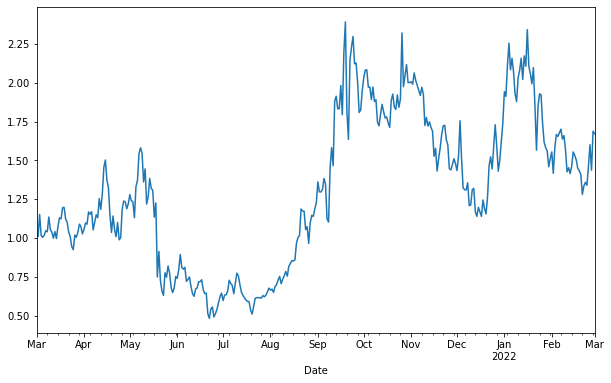

In [398]:
log_return.cumsum().apply(np.exp).plot(figsize=(10, 6));             

# Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders

In [411]:
Atom['SMA1'] = Atom['Adj Close'].rolling(window=20).mean()
Atom['SMA2'] = Atom['Adj Close'].rolling(window=60).mean()
Atom[['Adj Close', 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2022-02-25,27.225927,27.604192,32.246626
2022-02-26,29.807392,27.532008,32.299632
2022-02-27,26.751556,27.285868,32.279415
2022-02-28,31.426020,27.333146,32.298906
2022-03-01,31.117987,27.343925,32.276376


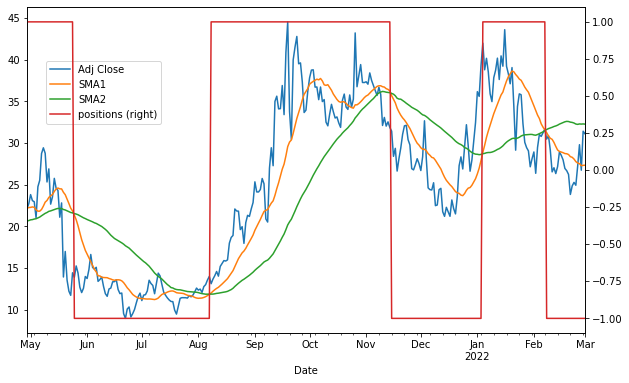

In [412]:
Atom.dropna(inplace=True)
Atom['positions'] = np.where(Atom['SMA1'] > Atom['SMA2'],1,-1)
ax = Atom[['Adj Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Plotting the movement of the Atom

array([<AxesSubplot:xlabel='Date'>], dtype=object)

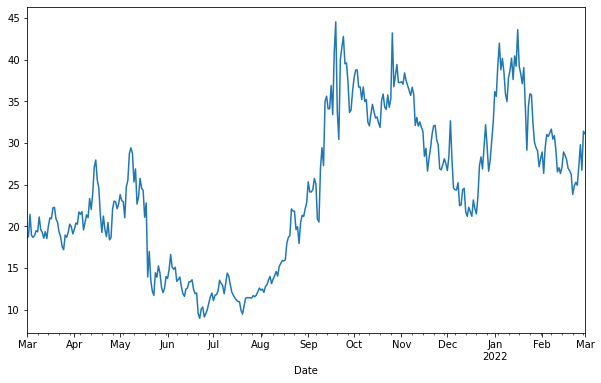

In [110]:
Atom.plot(figsize=(10, 6), subplots=True)                   #Plotting the Adj CLose Column of the data

# Calculation of Annualized Volatility

Annualized volatility is calculated by computing the daily volatility and then multiplying it with the square root of 365 which is the number of days in a year.

In [115]:
normal_return = Atom.pct_change()
dfnr = pd.DataFrame(normal_return, columns = ['Adj Close']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 1.67883085 and its annulized volatility is 1.52337674


In [117]:
dflr = pd.DataFrame(log_return, columns = ['Adj Close'])
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.51546925 and its annulized volatility is 1.53340143


# Binomial Tree (CRR Tree)

The Binomial options pricing model approach has been widely used since it is able to handle a variety of conditions for which other models cannot easily be applied. This is largely because the BOPM is based on the description of an underlying instrument over a period of time rather than a single point.

In [152]:
S0 = 31.12              # spot stock price
K = 28                  # strike
T = 1/52                # maturity 
r = 0.0169              # risk free rate 
sig = 1.53              # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [153]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [154]:
print('up factor', u)

up factor 1.111917955996825


In [155]:
print('down factor' , d)

down factor 0.8993469298762321


In [156]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [157]:
S

array([[31.12      , 34.60288679, 38.47557115, 42.78167843, 47.56971644],
       [ 0.        , 27.98767646, 31.12      , 34.60288679, 38.47557115],
       [ 0.        ,  0.        , 25.1706309 , 27.98767646, 31.12      ],
       [ 0.        ,  0.        ,  0.        , 22.63712962, 25.1706309 ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 20.35863302]])

In [158]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.47388548318664725

In [159]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 2.8293691 ],
       [0.        , 0.        , 0.        , 0.        , 7.64136698]])

In [160]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[1.36603225, 0.41193112, 0.        , 0.        , 0.        ],
       [0.        , 2.22562775, 0.78303217, 0.        , 0.        ],
       [0.        , 0.        , 3.52535607, 1.48845122, 0.        ],
       [0.        , 0.        , 0.        , 5.36059547, 2.8293691 ],
       [0.        , 0.        , 0.        , 0.        , 7.64136698]])

In [161]:
print('European ' + payoff, str( V[0,0]))

European put 1.3660322494751227


# Monte Carlo Simulation


In [162]:
def mcs_simulation_np(n,p):
    M = n
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [163]:
T = 1/52
r = 0.0169
sigma = 1.53
S0 = 31.12
K = 28

In [168]:
S = mcs_simulation_np(100,10000)

In [169]:
S = np.transpose(S)
S

array([[31.12      , 31.0693704 , 30.25827448, ..., 29.49725185,
        29.52014664, 29.15044473],
       [31.12      , 31.07180478, 31.52271698, ..., 36.63711095,
        37.19285781, 37.56841266],
       [31.12      , 31.05303165, 31.51462141, ..., 31.44595343,
        31.52344167, 30.96547746],
       ...,
       [31.12      , 31.29409486, 31.85246714, ..., 32.90414908,
        33.51977452, 33.07722373],
       [31.12      , 31.89560373, 30.5303678 , ..., 32.25190605,
        32.32221011, 31.70927137],
       [31.12      , 30.25137915, 30.29720293, ..., 24.15349283,
        23.79559482, 23.7436848 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

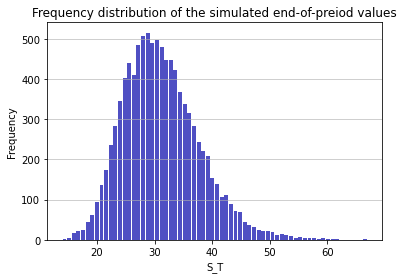

In [170]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [171]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 1.2104264592789757


# Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.



In [200]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [198]:
delta(31.12, 28, 1/52, 0.0169, 0, 1.53, 'put')


-0.2724090154939124

In [357]:
S = np.linspace(20,150,51)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 28, 1/52, 0.0169, 0, 1.53, 'put')

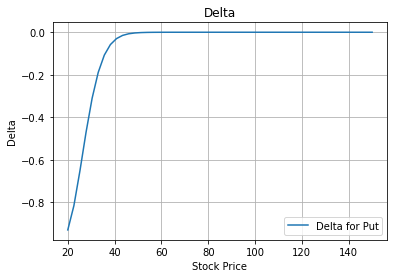

In [358]:
fig = plt.figure()
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [359]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 28, T[i], 0.0169, 0, 1.533, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11464/2588004393.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


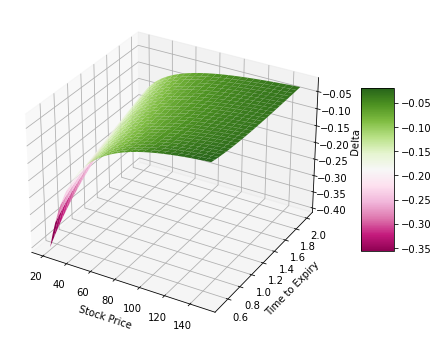

In [360]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.PiYG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [361]:
d = delta(31.12, 28, 1/52, 0.0169, 0, 1.53, 'put')
print('The value of Delta is', d.round(4),'.','If the cypto atom price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is -0.2724 . If the cypto atom price increase 1 dollar, then the value of the option will increase $ -0.2724 .


# Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [208]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [209]:
gamma(31.12, 28, 1/52, 0.0169, 0, 1.53, 'put')

0.050298678117731276

In [362]:
S = np.linspace(20,150,51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 28, 1/52, 0.0169, 0, 1.53, 'put')

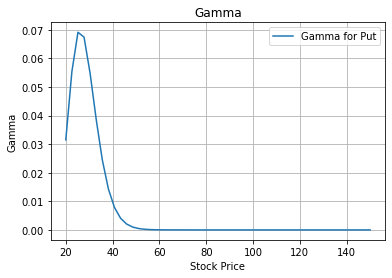

In [363]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [364]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 28, T[i], 0.0169, 0, 1.53, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11464/2721504999.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


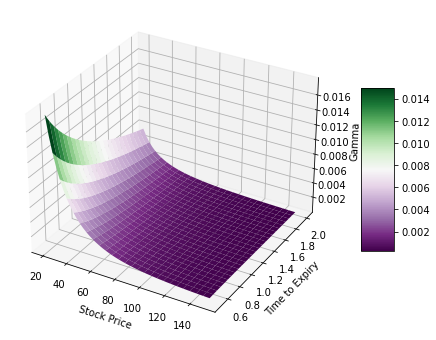

In [365]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.PRGn, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta
Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [317]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [318]:
theta(31.12, 28, 1/52, 0.0169, 0, 1.53, 'put')

57.17909035501335

In [339]:
T = np.linspace(0.25,7,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(31.12, 28, T[i], 0.0169, 0, 1.53, 'put')

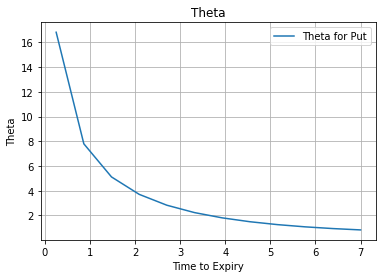

In [340]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [366]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 28, T[i], 0.0169, 0, 1.53, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11464/2273786227.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


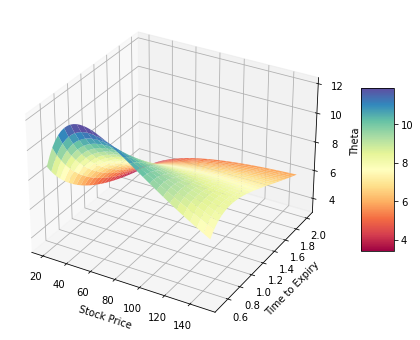

In [367]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [230]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [231]:
rho(31.12, 28, 1/52, 0.0169, 0, 1.53, 'put')

-0.18544990574990414

In [343]:
r = np.linspace(0,0.8,51)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(31.12, 28, 1/52, r[i], 0, 1.53, 'put')

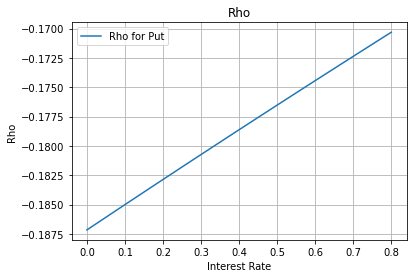

In [344]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])


In [368]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 28, T[i], 0.0169, 0, 1.53, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11464/2476565794.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


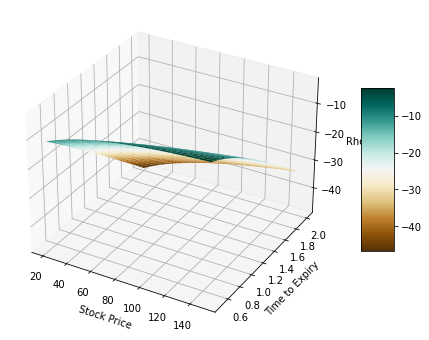

In [369]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.BrBG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [238]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [239]:
vega(31.12, 28, 1/52, 0.0169, 0, 1.53, 'put')

1.4332562209628827

In [347]:
vol = np.linspace(0.1,2,21)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(31.12, 28, 1/52, 0.0169, 0, vol[i], 'put')

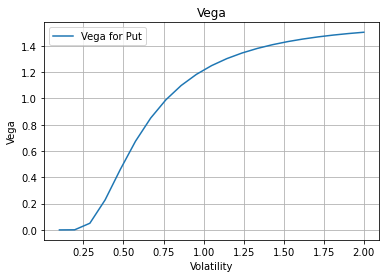

In [348]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])


In [370]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 28, T[i], 0.0169, 0, 1.53, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11464/2724197941.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


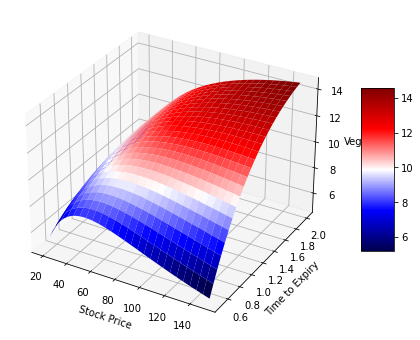

In [371]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.seismic, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [356]:
v = vega(31.12, 28, 1/52, 0.0169, 0, 1.53, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 1.4333 . If the volatility increases 1%, then the value of the option will increase $ 0.014333 .


# Speed
Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [245]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [246]:
speed(31.12, 28, 1/52, 0.0169, 0, 1.53, 'put')


-0.00086382971701116

In [372]:
S = np.linspace(20,150,51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 28, 1/52, 0.0169, 0, 1.53, 'put')

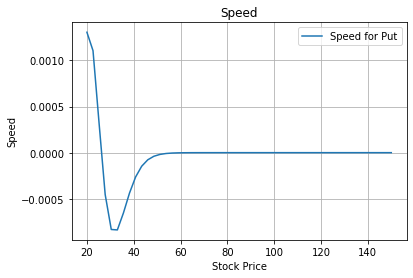

In [373]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [374]:
S = np.linspace(20, 150, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 28, T[i], 0.0169, 0, 1.53, 'put')

C:\Users\user\AppData\Local\Temp/ipykernel_11464/2708354967.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


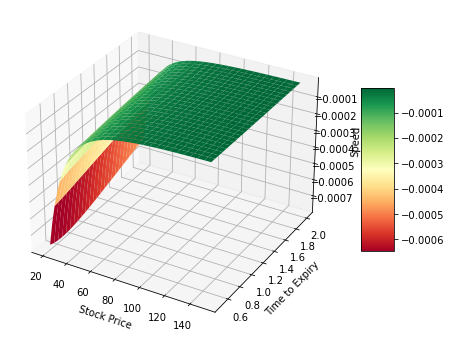

In [375]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.RdYlGn, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);


# END